# Rebalance

![title](doc/exercise023.png)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format='retina'

import vectorbt as vbt
import starfishX as sx
import starfishX.utilHelpers as ut
from tvDatafeed import TvDatafeed, Interval 

tv = TvDatafeed()

you are using nologin method, data you access may be limited


In [109]:
basket = ['cpall','advanc','kbank','mint']
df = pd.DataFrame()
for i in basket:
  tmp = tv.get_hist(symbol=i,exchange='SET',
                            interval=Interval.in_daily,n_bars=1100)
  df[i] = tmp['close']
    
df.head(1),df.tail(1)

(                     cpall  advanc  kbank       mint
 datetime                                            
 2019-01-15 09:00:00  74.25   172.0  182.0  34.721497,
                      cpall  advanc  kbank  mint
 datetime                                       
 2023-07-27 09:00:00  62.75   224.0  125.0  33.0)

In [110]:
df

cpall  advanc  kbank       mint
datetime                                            
2019-01-15 09:00:00  74.25   172.0  182.0  34.721497
2019-01-16 09:00:00  74.25   171.5  183.0  34.721497
2019-01-17 09:00:00  74.25   171.0  184.5  34.967748
2019-01-18 09:00:00  74.75   172.0  183.0  35.952755
2019-01-21 09:00:00  75.75   172.0  187.5  35.706504
...                    ...     ...    ...        ...
2023-07-21 09:00:00  63.50   222.0  129.0  31.750000
2023-07-24 09:00:00  63.00   222.0  124.5  31.000000
2023-07-25 09:00:00  61.75   222.0  124.5  32.500000
2023-07-26 09:00:00  61.75   223.0  123.0  32.500000
2023-07-27 09:00:00  62.75   224.0  125.0  33.000000

[1100 rows x 4 columns]

In [24]:
import pandas as pd

# สร้าง DataFrame ตัวอย่าง
data = {'Column1': range(50),
        'Column2': range(100, 150)}
df = pd.DataFrame(data)

# กำหนดจำนวนแถวใน DataFrame ย่อยที่ต้องการ
num_rows_per_sub_df = 5

# ใช้ List comprehension เพื่อแบ่ง DataFrame เป็นส่วนๆ
sub_dfs = [df.iloc[i:i+num_rows_per_sub_df] for i in range(0, len(df), num_rows_per_sub_df)]

In [26]:
sub_dfs[9]

Column1  Column2
45       45      145
46       46      146
47       47      147
48       48      148
49       49      149

# ทดลองแบ่งช่วงราคาออกมา ช่วงละ 100 วัน

In [111]:
# กำหนดจำนวนแถวใน DataFrame ย่อยที่ต้องการ
num_rows_per_sub_df = 100
# ใช้ List comprehension เพื่อแบ่ง DataFrame เป็นส่วนๆ
sub_dfs = [df.iloc[i:i+num_rows_per_sub_df] for i in range(0, len(df), num_rows_per_sub_df)]

In [112]:
len(sub_dfs)

11

In [113]:
# buy and hold
(df.tail(1000).rebase(100).iloc[-1]/100)-1

cpall    -0.243976
advanc    0.128463
kbank    -0.354005
mint     -0.151841
Name: 2023-07-27 09:00:00, dtype: float64

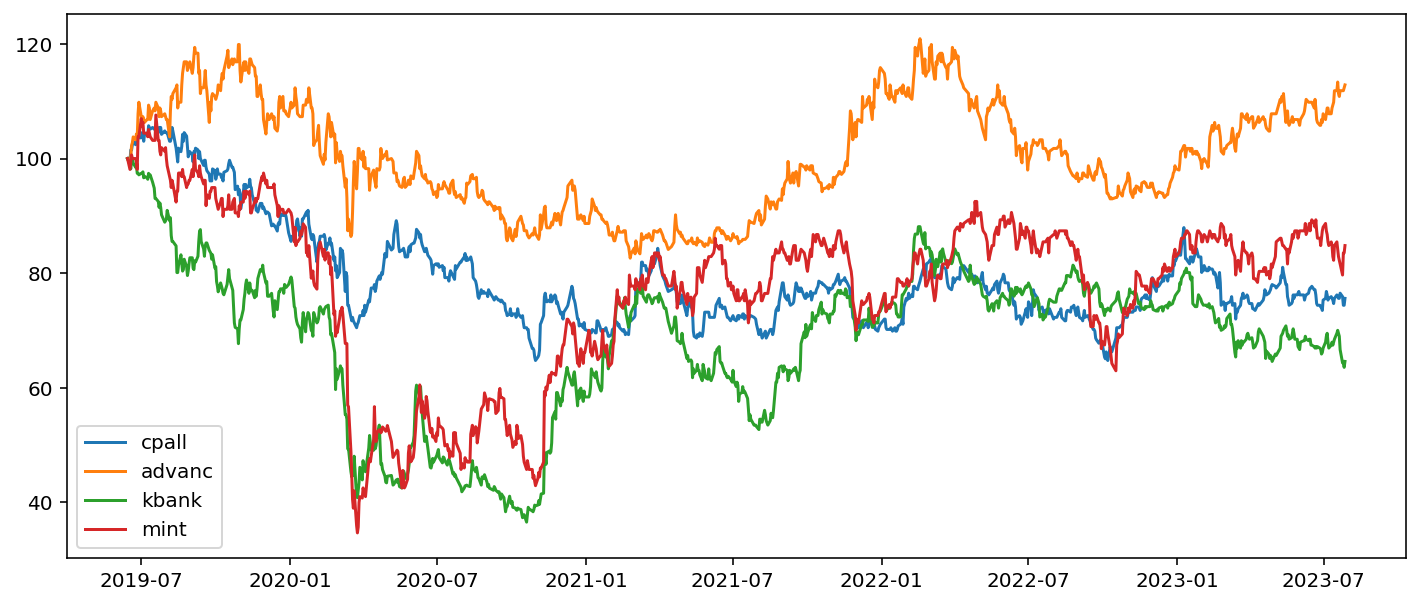

In [114]:
%matplotlib inline 
plt.subplots(facecolor='w',figsize=(12,5))
plt.plot(df.tail(1000).rebase(100).index,df['cpall'].tail(1000).rebase(100),label='cpall') 
plt.plot(df.tail(1000).rebase(100).index,df['advanc'].tail(1000).rebase(100),label='advanc') 
plt.plot(df.tail(1000).rebase(100).index,df['kbank'].tail(1000).rebase(100),label='kbank') 
plt.plot(df.tail(1000).rebase(100).index,df['mint'].tail(1000).rebase(100),label='mint') 
plt.legend()

# แบ่ง dataframe ทำการทดสอบ

In [140]:
what_select = []
for i in range(len(sub_dfs)-1):
    k = sub_dfs[i].rebase(100).iloc[-1]
    k = k.sort_values(ascending=False)
    print(k.index[0:2])
    what_select.append(k.index[0:2])

Index(['advanc', 'mint'], dtype='object')
Index(['advanc', 'cpall'], dtype='object')
Index(['advanc', 'cpall'], dtype='object')
Index(['mint', 'cpall'], dtype='object')
Index(['kbank', 'mint'], dtype='object')
Index(['mint', 'cpall'], dtype='object')
Index(['advanc', 'kbank'], dtype='object')
Index(['mint', 'cpall'], dtype='object')
Index(['kbank', 'advanc'], dtype='object')
Index(['mint', 'cpall'], dtype='object')


In [163]:
p1 = [] #ส่วนที่1
p2 = [] #ส่วนที่2

year = 1 # เริ่ม แถวที่ 101 
for i in what_select:
  m = (sub_dfs[year][i[0]].rebase(100).iloc[-1]/100)-1
  n = (sub_dfs[year][i[1]].rebase(100).iloc[-1]/100)-1
  p1.append(m)
  p2.append(n)
  year = year+1

In [164]:
print(sum(p1),sum(p2))

-0.3611371976822534 -0.1699361428395827


In [191]:
p1

[0.1687657430730478,
 -0.13478260869565217,
 -0.05897435897435899,
 0.12831858407079633,
 -0.11610486891385763,
 -0.06666666666666676,
 -0.014150943396226356,
 -0.22058823529411764,
 -0.03202846975088969,
 -0.01492537313432829]

In [192]:
p2

[-0.06329113934136155,
 -0.21587301587301577,
 0.053497942386831365,
 -0.0862745098039216,
 0.1428571428571428,
 -0.020746887966805017,
 0.10074626865671643,
 -0.13461538461538458,
 0.04166666666666674,
 0.012096774193548487]

# ตรวจคำตอบ block แรก

In [184]:
#สุ่มตรวจ block แรกเลือก = advanc,mint
(sub_dfs[0].rebase(100).iloc[-1]/100)-1

cpall     0.114478
advanc    0.156977
kbank     0.063187
mint      0.120567
Name: 2019-06-13 09:00:00, dtype: float64

In [185]:
#ผลตอบแทน block แรกต้องเป็น 0.168766 และ -0.063291
(sub_dfs[1].rebase(100).iloc[-1]/100)-1

cpall    -0.045181
advanc    0.168766
kbank    -0.219638
mint     -0.063291
Name: 2019-11-07 09:00:00, dtype: float64

# ตรวจคำตอบ block สุดท้าย 

In [193]:
#สุ่มตรวจ block ที่ 10 เลือก = mint,cpall
(sub_dfs[9].rebase(100).iloc[-1]/100)-1

cpall     0.147465
advanc    0.041667
kbank    -0.032028
mint      0.304762
Name: 2023-02-27 09:00:00, dtype: float64

In [194]:
#ผลตอบแทน block สุดท้ายต้องเป็น -0.014925 และ 0.012097
(sub_dfs[10].rebase(100).iloc[-1]/100)-1

cpall     0.012097
advanc    0.108911
kbank    -0.087591
mint     -0.014925
Name: 2023-07-27 09:00:00, dtype: float64